<h1 style="color:rgb(0,120,170)">Hands-on AI II</h1>
<h2 style="color:rgb(0,120,170)">Unit 1 &ndash; Recap Hands-on AI I</h2>

<b>Authors:</b> B. Schäfl, S. Lehner, J. Brandstetter, A. Schörgenhumer<br>
<b>Date:</b> 07-03-2023

This file is part of the "Hands-on AI II" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h2>Table of contents</h2>
<ol>
    <a href="#tabular-data"><li style="font-size:large;font-weight:bold">Tabular data</li></a>
    <ol style="margin-bottom:15px">
        <a href="#dimensionality-reduction"><li style="font-size:medium">Dimensionality reduction</li></a>
        <a href="#clustering-algorithms"><li style="font-size:medium">Clustering algorithms</li></a>
        <a href="#tasks-one"><li style="font-size:medium">Tasks</li></a>
    </ol>
    <a href="#sequence-data"><li style="font-size:large;font-weight:bold">Sequence data</li></a>
    <ol style="margin-bottom:15px">
        <a href="#corona-virus"><li style="font-size:medium">Corona virus</li></a>
        <a href="#tasks-two"><li style="font-size:medium">Tasks</li></a>
    </ol>
    <a href="#image-data"><li style="font-size:large;font-weight:bold">Image data</li></a>
    <ol style="margin-bottom:15px">
        <a href="#color-models"><li style="font-size:medium">Color models</li></a>
        <a href="#image-augmentation"><li style="font-size:medium">Image augmentation</li></a>
        <a href="#segmentation"><li style="font-size:medium">Segmentation</li></a>
        <a href="#tasks-three"><li style="font-size:medium">Tasks</li></a>
    </ol>
    <a href="#classifiers"><li style="font-size:large;font-weight:bold">Classifiers</li></a>
    <ol style="margin-bottom:15px">
        <a href="#k-nearest-neighbors"><li style="font-size:medium">$k$-nearest neighbours</li></a>
        <a href="#convolutional-neural-networks"><li style="font-size:medium">Convolutional neural networks</li></a>
        <a href="#tasks-four"><li style="font-size:medium">Tasks</li></a>
    </ol>
</ol>

<h3 style="color:rgb(0,120,170)">How to use this notebook</h3>

This notebook is designed to run from start to finish. There are different tasks (displayed in <span style="color:rgb(248,138,36)">orange boxes</span>) which might require small code modifications. Most/All of the used functions are imported from the file <code>u1_utils.py</code> which can be seen and treated as a black box. However, for further understanding, you can look at the implementations of the helper functions. In order to run this notebook, the packages which are imported at the beginning of <code>u1_utils.py</code> need to be installed.

In [1]:
# Import pre-defined utilities specific to this notebook.
import u1_utils as u1

# Import additional utilities needed in this notebook.
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch

from pathlib import Path
from PIL import Image
from scipy import signal
from sklearn.neighbors import KNeighborsClassifier

# Set default plotting style.
sns.set()

# Setup Jupyter notebook (warning: this may affect all Jupyter notebooks running on the same Jupyter server).
u1.setup_jupyter()

/home/olegbushtyrkov/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


<h3 style="color:rgb(0,120,170)">Module versions</h3>

As mentioned in the introductory slides, specific minimum versions of Python itself as well as of used modules are recommended.

In [3]:
u1.check_module_versions()

Installed Python version: 3.10 (✓)
Installed numpy version: 1.26.4 (✓)
Installed pandas version: 2.2.1 (✓)
Installed PyTorch version: 2.1.1+cu121 (✓)
Installed scikit-learn version: 1.3.1 (✓)
Installed scipy version: 1.11.3 (✓)
Installed matplotlib version: 3.8.3 (✓)
Installed seaborn version: 0.13.0 (✓)
Installed PIL version: 9.0.1 (✓)


<a name="tabular-data"></a><h2> Tabular data</h2>
<p>We will start with a data set composed of various measurements of different <i>wine</i> attributes (e.g. the <i>alcohol concentration</i>). The data set distinguishes <i>three</i> different classes, one for each cultivator. It was published/donored by <i>S. Aeberhard</i> and originally gathered by:

<center><cite>Forina, M. et al, PARVUS - An Extendible Package for Data Exploration, Classification and Correlation.
<br>Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno, 16147 Genoa, Italy.</cite></center>

Currently, it is maintained by the <a href="https://archive.ics.uci.edu/ml">UCI Machine Learning Repository</a>:

<center><cite>Lichman, M. (2013). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science.</cite></center></p>

In [4]:
data_wine = u1.load_wine()
data_wine_X, data_wine_y = data_wine.drop(columns='cultivator'), data_wine['cultivator']
data_wine

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  cultivator  
0                            3.92   1065.0           0  
1                            3.40   1050.0           0  
2                            3.17   1185.0           0  
3                            3.45   1480.0           0  
4                            2.93    735.0           0  
..                            ...      ...         ...  
173                          1.74    740.0           2  
174                          1.56    750.0           2  
175                          1.56    835.0           2  
176                          1.62    840.0           2  
177                          1.60    560.0           2  

[178 rows x 14 columns]

<p>Above you can see a table with all 178 samples (we start to count at 0). Tabular data can have columns in various data types. In our case the thirteen features are given in floating point numbers (recall <i>primitive data types</i>). We would refer to the cultivator as a <i>label</i>, <i>target</i> or <i>class</i> rather than a feature, because we want to predict the cultivator using all the features.

Summarizing, the popular wine data set contains results of a chemical analysis for $n=178$ different wines from three different classes, namely:</p>

<center>    
    <ul>
        <li style="display:inline-block;width:250px;text-align:left;vertical-top:sub;">
            <span style="font-size:26px;vertical-align:sub">&bull;</span>
            <span style="vertical-top:sub;">Cultivator 0 ($n_{c0}=59$)</span>
        </li>
        <li style="display:inline-block;width:250px;text-align:left;vertical-top:sub;">
            <span style="font-size:26px;vertical-align:sub">&bull;</span>
            <span style="vertical-top:sub;">Cultivator 1 ($n_{c1}=71$)</span>
        </li>
        <li style="display:inline-block;width:250px;text-align:left;vertical-top:sub;">
            <span style="font-size:26px;vertical-align:sub">&bull;</span>
            <span style="vertical-top:sub;">Cultivator 2 ($n_{c2}=48$)</span>
        </li>
    </ul>
</center>

<p>Moreover, we have the following $d=13$ features:</p>

<center>
    <ul>       
        <ul>
            <li style="display:inline-block;width:250px;text-align:left;vertical-top:sub;">
                <span style="font-size:26px;vertical-align:sub">&bull;</span>
                <span style="vertical-top:sub;">alcohol</span>
            </li>
            <li style="display:inline-block;width:250px;text-align:left;vertical-top:sub;">
                <span style="font-size:26px;vertical-align:sub">&bull;</span>
                <span style="vertical-top:sub;">malic acid</span>
            </li>
            <li style="display:inline-block;width:250px;text-align:left;vertical-top:sub;">
                <span style="font-size:26px;vertical-align:sub">&bull;</span>
                <span style="vertical-top:sub;">ash</span>
            </li>
        </ul>
        <ul>
            <li style="display:inline-block;width:250px;text-align:left;vertical-top:sub;">
                <span style="font-size:26px;vertical-align:sub">&bull;</span>
                <span style="vertical-top:sub;">alcalinity of ash</span>
            </li>
            <li style="display:inline-block;width:250px;text-align:left;vertical-top:sub;">
                <span style="font-size:26px;vertical-align:sub">&bull;</span>
                <span style="vertical-top:sub;">magnesium</span>
            </li>
            <li style="display:inline-block;width:250px;text-align:left;vertical-top:sub;">
                <span style="font-size:26px;vertical-align:sub">&bull;</span>
                <span style="vertical-top:sub;">total phenols</span>
            </li>
        </ul>
        <ul>
            <li style="display:inline-block;width:250px;text-align:left;vertical-top:sub;">
                <span style="font-size:26px;vertical-align:sub">&bull;</span>
                <span style="vertical-top:sub;">flavanoids</span>
            </li>
            <li style="display:inline-block;width:250px;text-align:left;vertical-top:sub;">
                <span style="font-size:26px;vertical-align:sub">&bull;</span>
                <span style="vertical-top:sub;">nonflavanoid phenols</span>
            </li>
            <li style="display:inline-block;width:250px;text-align:left;vertical-top:sub;">
                <span style="font-size:26px;vertical-align:sub">&bull;</span>
                <span style="vertical-top:sub;">proanthocyanins</span>
            </li>
        </ul>
        <ul>
            <li style="display:inline-block;width:250px;text-align:left;vertical-top:sub;">
                <span style="font-size:26px;vertical-align:sub">&bull;</span>
                <span style="vertical-top:sub;">color intensity</span>
            </li>
            <li style="display:inline-block;width:250px;text-align:left;vertical-top:sub;">
                <span style="font-size:26px;vertical-align:sub">&bull;</span>
                <span style="vertical-top:sub;">hue</span>
            </li>
            <li style="display:inline-block;width:250px;text-align:left;vertical-top:sub;">
                <span style="font-size:26px;vertical-align:sub">&bull;</span>
                <span style="vertical-top:sub;">OD280/OD315 of diluted wines</span>
            </li>
        </ul>
        <ul>
            <li style="display:inline-block;width:250px;text-align:left;vertical-top:sub;">
                <span style="font-size:26px;vertical-align:sub">&bull;</span>
                <span style="vertical-top:sub;">proline</span>
            </li>
            <li style="display:inline-block;width:250px;text-align:left;vertical-top:sub;">
            </li>
            <li style="display:inline-block;width:250px;text-align:left;vertical-top:sub;">
            </li>
        </ul>
    </ul>
</center>

<p>In machine learning, we consider a feature vector $\boldsymbol{x}$ as input to the machine learning algorithm, and therefore as <i>input feature vector</i>. It is very important to get familiar with the input features. Important questions are:
    
<ul>
    <li>How do they correlate?</li>
    <li>Which ones have a good separation power?</li>
</ul>
</p>

/home/olegbushtyrkov/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/olegbushtyrkov/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/olegbushtyrkov/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/olegbushtyrkov/.local/lib

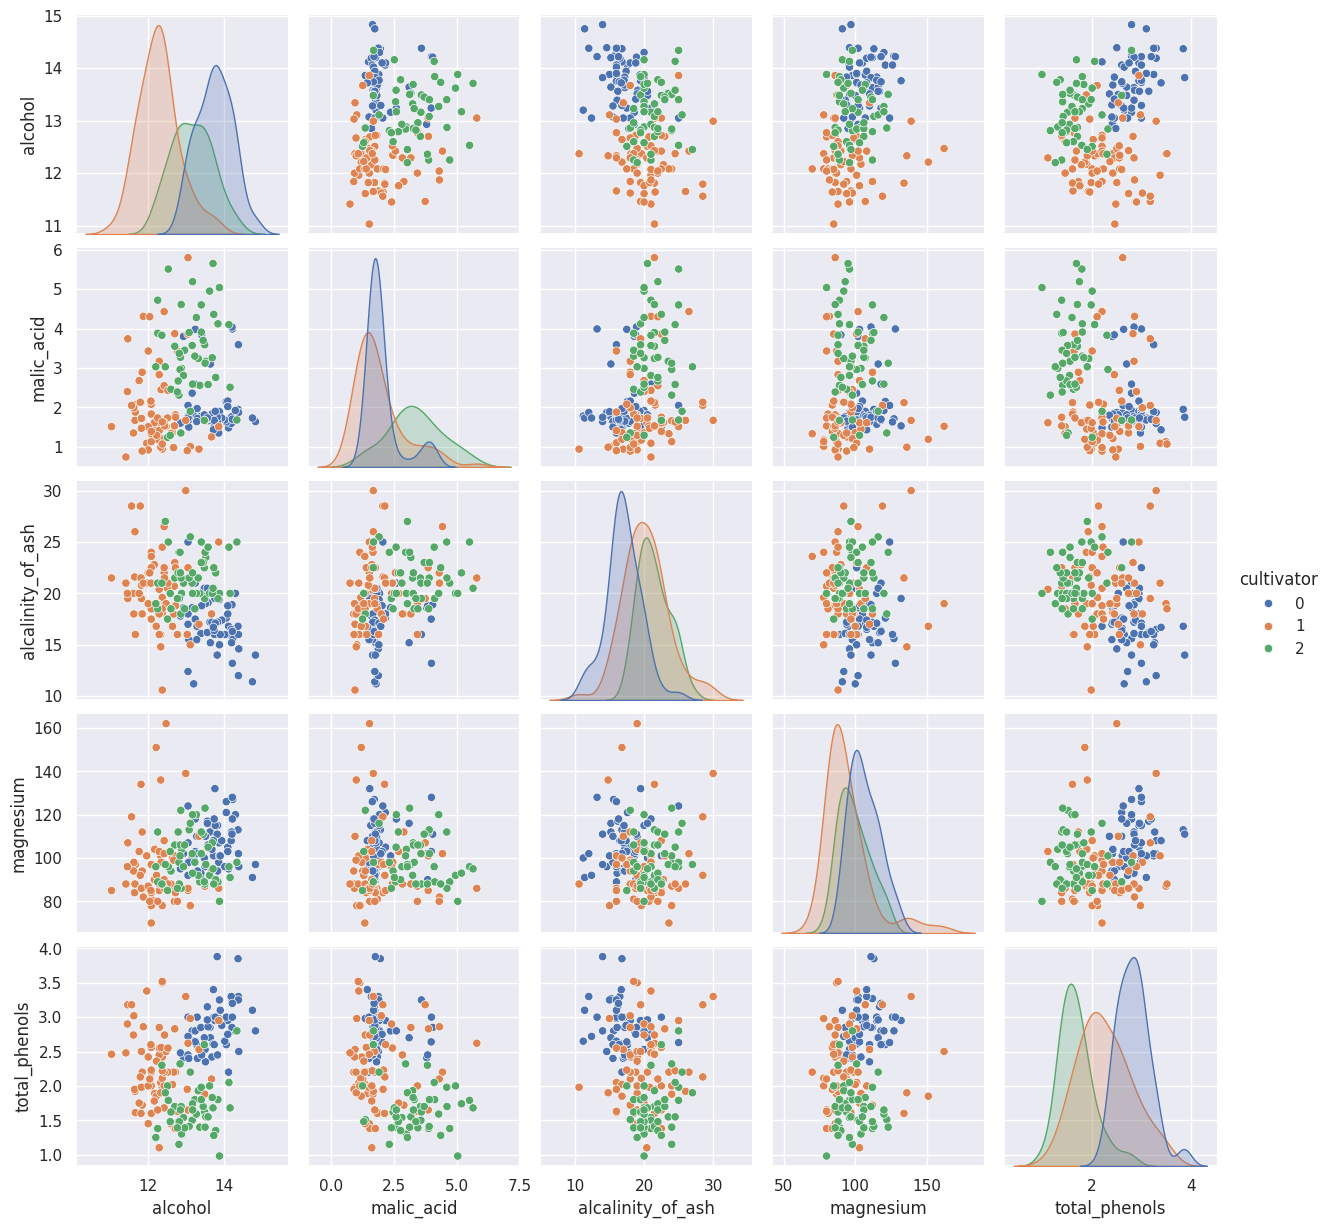

In [5]:
# Define features of which to compute correlations and plot a corresponding pairplot.
num_cultivators = data_wine_y.unique().size
features = ['alcohol', 'malic_acid', 'alcalinity_of_ash', 'magnesium', 'total_phenols']
sns.pairplot(data_wine, vars=features, hue='cultivator', palette='deep')
plt.show()

<a name="dimensionality-reduction"></a><h3 style="color:rgb(0,120,170)">Dimensionality reduction</h3>
<p>If we could plot the samples of the table as datapoints, we would probably see, that samples from the same cultivator form a so called <i>cluster</i> as they are closer to each other in feature space than samples from different cultivators. 
A way of visualizing clusters would be a plot, where every sample is displayed as a dot. Since we have thirteen features, we would need a thirteen dimensional space (one coordinate for every feature) to represent every sample as a dot. This makes it impossible to plot the samples directly.</p>

<p>Often data is described with hundreds or thousands of features and therefore the visualization of those features is a very common problem. To overcome this problem several <i>dimensionality reduction</i> techniques exist. We will apply one of the basic techniques to our data, i.e. the <i>Principal Component Ananlysis</i> or in short <i>PCA</i>. This method will pop up quite often when studying machine learning related topics.</p>

<p>For now it is not important what exactly is going on behind the scenes. All you need to know is, that we need the number of dimensions to which we want to reduce the data. In our case we choose the dimension $d=2$, so we can represent every sample as a 2-dimensional dot.</p>

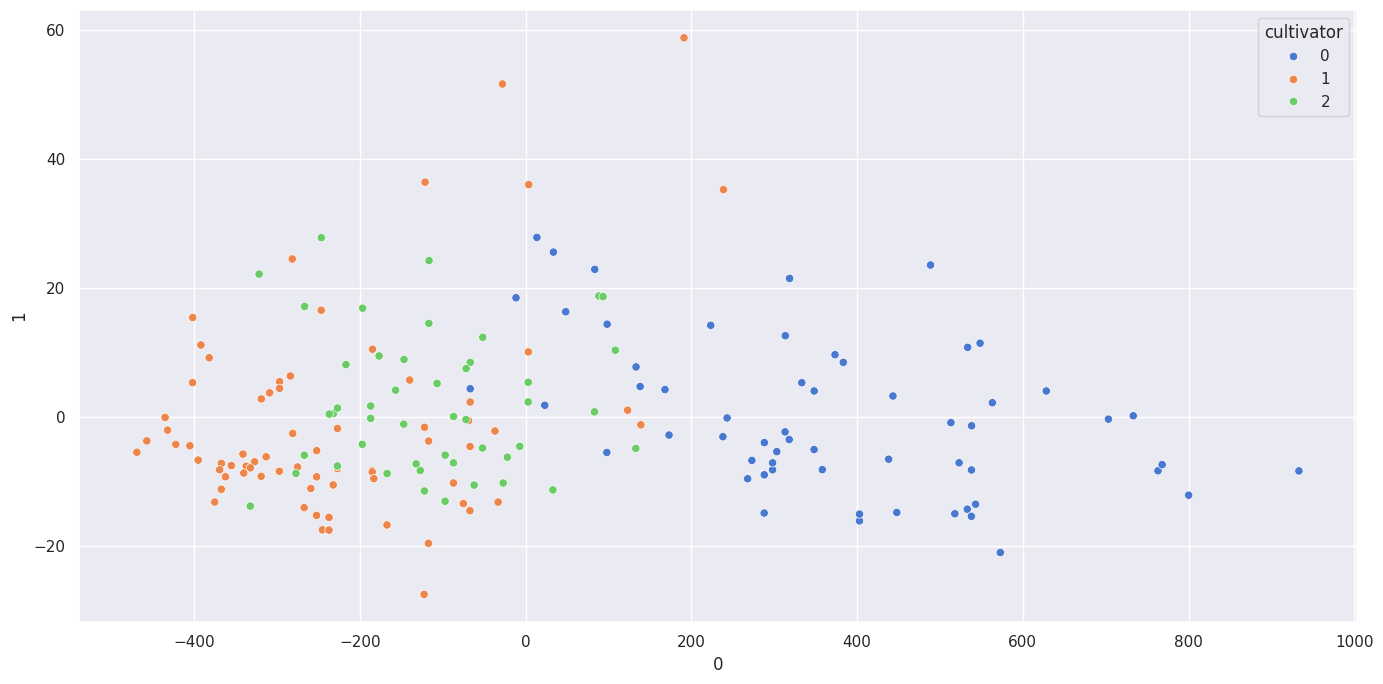

In [6]:
# Compute Principal Component Analysis (PCA) and reduce the dimensionality of the wine data set.
data_wine_pca = u1.apply_pca(n_components=2, data=data_wine_X)
u1.plot_points_2d(data=data_wine_pca, targets=data_wine_y, figsize=(14, 7))

<p>We can try a different downprojection method. The next one we will use is called <i>t-SNE</i>. Again, for now it is not important how the method exactly works. The key takeaway point is, that such a downprojection is not unique i.e. different methods will yield different results. Even the same method will yield different results sometimes.</p>

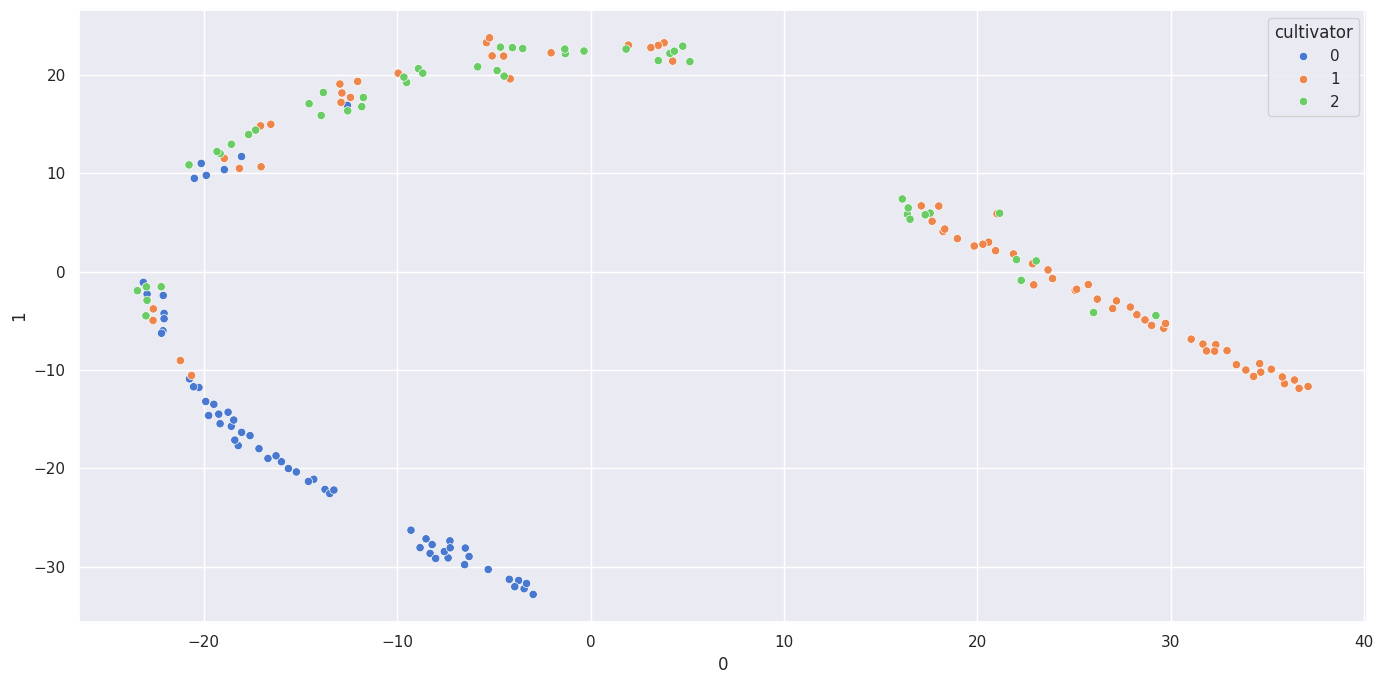

In [7]:
# Set random seed for reproducibility.
u1.set_seed(0)

# Compute t-SNE and reduce the dimensionality of the wine data set.
data_wine_tsne = u1.apply_tsne(n_components=2, data=data_wine_X, perplexity=11)
u1.plot_points_2d(data=data_wine_tsne, targets=data_wine_y, figsize=(14, 7))

<a name="clustering-algorithms"></a><h3 style="color:rgb(0,120,170)">Clustering algorithms</h3>
<p>Again, most times cultivator 0 is very clearly seperated from cultivators 1 and 2. Or stated differently, the cultivator-0-dots <i>cluster</i> together in space. Imagine now, that we have very high dimensional data with hundreds or thousands of features, but no labels. It would be very interesting to find samples that form such a cluster.</p>
    
<p>So let's pretend we don't know the labels. We will apply a clustering algorithm. As a demonstration we will apply one of the best known methods, the <i>$k$-means Clustering</i> algorithm. Here, $k$ is a hyperparameter. It determines how many clusters the algorithm should search for. If, for example $k=3$, the algorithm will assume that there are three clusters and will try to cluster the data accordingly. There are other clustering methods, where we do not need to specify the number of clusters – the algorithm will try to find the number of clusters on its own (which may or may not be the true amount of clusters).</p>

<p>Now lets try <i>$k$-means Clustering</i> with $k=3$. The output is an assignment to a cluster for every data point. Again we plot the downprojected version of the data set. But this time we color the dots according to the clustering algorithm's assignment.</p>

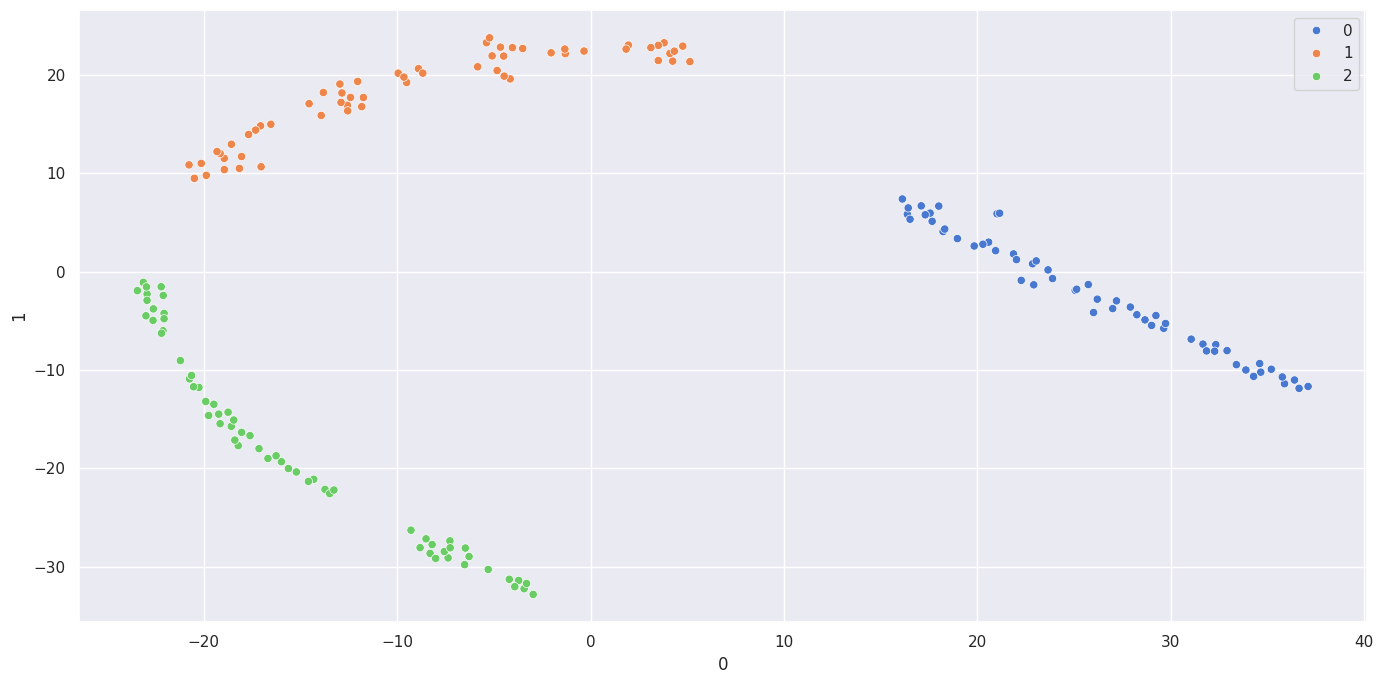

In [8]:
# Set random seed for reproducibility.
u1.set_seed(0)

# Compute k-means on the t-SNE downprojected data set.
k_means_clusters = u1.apply_k_means(k=3, data=data_wine_tsne)
u1.plot_points_2d(data=data_wine_tsne, targets=k_means_clusters, figsize=(14, 7))

<p>We will try another clustering algorithm, called <i>Affinity Propagation</i>. For this method we don't need to specify the number of clusters. Let's see what and how many clusters we get.</p>

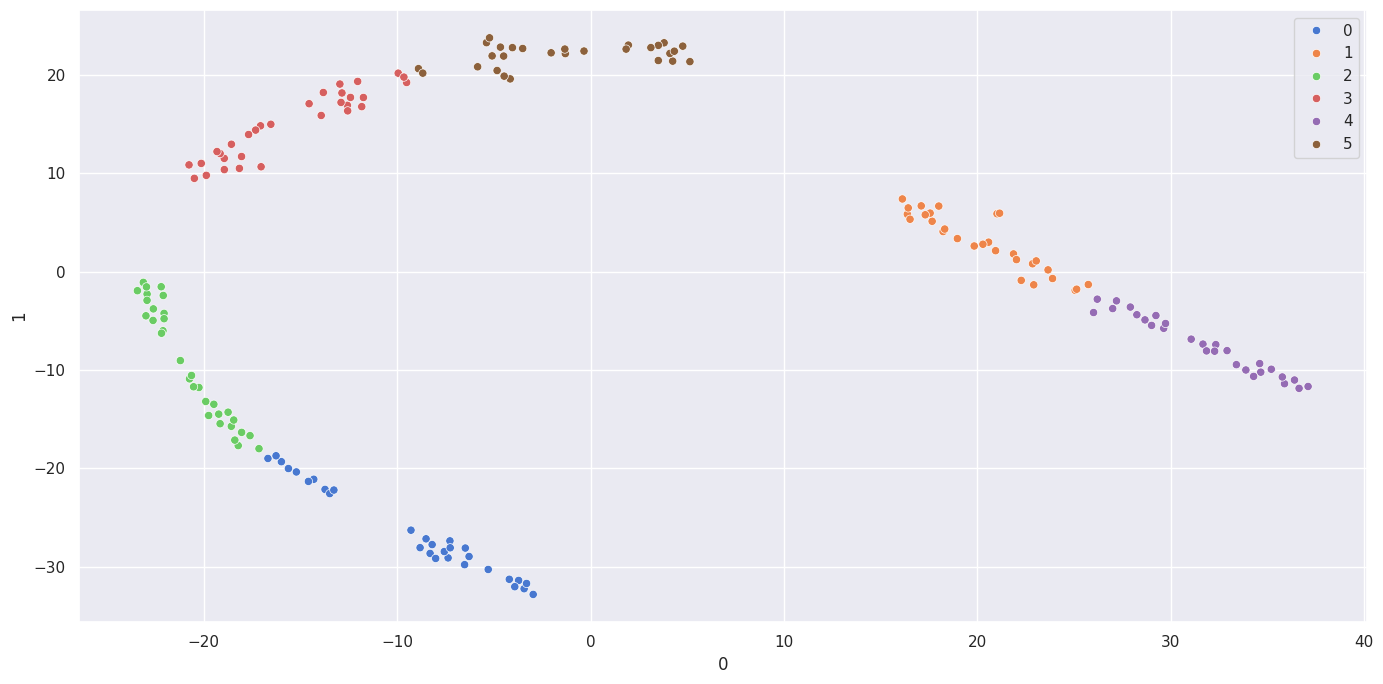

In [9]:
# Compute affinity propagation on the t-SNE downprojected data set.
affinity_propagation_clusters = u1.apply_affinity_propagation(data=data_wine_tsne)
u1.plot_points_2d(data=data_wine_tsne, targets=affinity_propagation_clusters, figsize=(14, 7))

<a name="tasks-one"></a><h3 style="color:rgb(0,120,170)">Tasks</h3>
    <div class="alert alert-warning">
        Execute the notebook until here and try to solve the following tasks:
        <ul>
            <li>Change the number of cluster centers of the $k$-means algorithm. What do you observe?</li>
            <li>The t-SNE projection method comprises a hyperparameter <i>perplexity</i>. Change this value and observe the resulting behavior.</li>
            <li>Change the random seed prior to executing the t-SNE method, but use the same perplexity value. What do you observe?</li>
        </ul>
</div>

<a name="sequence-data"></a><h2>Sequence data</h2>
<p><i>Sequence data</i> is data with some kind of <i>temporal</i> property (or <i>ordering</i>).  Sequences, such as
<center>
    <ul>
        <li style="display:inline-block;width:150px;text-align:left;vertical-top:sub;">
            <span style="font-size:26px;vertical-align:sub">&bull;</span>
            <span style="vertical-top:sub;">DNA</span>
        </li>
        <li style="display:inline-block;width:150px;text-align:left;vertical-top:sub;">
            <span style="font-size:26px;vertical-align:sub">&bull;</span>
            <span style="vertical-top:sub;">ECG</span>
        </li>
        <li style="display:inline-block;width:150px;text-align:left;vertical-top:sub;">
            <span style="font-size:26px;vertical-align:sub">&bull;</span>
            <span style="vertical-top:sub;">video</span>
        </li>
        <li style="display:inline-block;width:150px;text-align:left;vertical-top:sub;">
            <span style="font-size:26px;vertical-align:sub">&bull;</span>
            <span style="vertical-top:sub;">sound</span>
        </li>
        <li style="display:inline-block;width:150px;text-align:left;vertical-top:sub;">
            <span style="font-size:26px;vertical-align:sub">&bull;</span>
            <span style="vertical-top:sub;">text</span>
        </li>
    </ul>
</center>
are very common. In this section we will focus on <i>Corona virus</i> data as provided by the <a href="https://github.com/CSSEGISandData/COVID-19">Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE)</a>:</p>

<p><center><cite>Dong E, Du H, Gardner L. An interactive web-based dashboard to track COVID-19 in real time. Lancet Inf Dis. 20(5):533-534. doi: 10.1016/S1473-3099(20)30120-1</cite></center></p>

<p>It comprises COVID-19 data from all over the world, whereas this section is focusing on the development of <i>confirmed</i>, <i>deceased</i> and <i>recovered</i> cases.</p>

<a name="corona-virus"></a><h3 style="color:rgb(0,120,170)">Corona virus</h3>

<p><b>S</b>evere <b>A</b>cute <b>R</b>espiratory <b>S</b>yndrome coronavirus 2 (SARS-CoV-2), previously known by the provisional name 2019 <i>novel coronavirus</i> (2019-nCoV), is a positive-sense single-stranded RNA virus. It is contagious in humans and is the cause of the ongoing coronavirus outbreak, an epidemic of coronavirus disease 2019 (COVID-19) that has been designated a <i>Public Health Emergency of International Concern</i> by the World Health Organization (WHO).

SARS-CoV-2 has close genetic similarity to <i>bat coronaviruses</i>, from which it likely originated. To avoid confusion with the disease SARS, the WHO sometimes refers to the virus as "the virus responsible for COVID-19" in public health communications.</p>

In [10]:
data_covid_19 = u1.load_covid_19(country_or_region='Austria')
data_covid_19

confirmed  deceased  recovered
1/22/20          0         0          0
1/23/20          0         0          0
1/24/20          0         0          0
1/25/20          0         0          0
1/26/20          0         0          0
...            ...       ...        ...
2/25/23    5897047     21872          0
2/26/23    5901938     21872          0
2/27/23    5905405     21872          0
2/28/23    5911294     21887          0
3/1/23     5919616     21891          0

[1135 rows x 3 columns]

<p>Tables are nice, but plotting allows most often for a better analysis – especially when comparing different properties. As the current data at hand is of the sequence type, a <i>lineplot</i> seems to be an obvious choice.</p>

/home/olegbushtyrkov/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/olegbushtyrkov/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/olegbushtyrkov/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


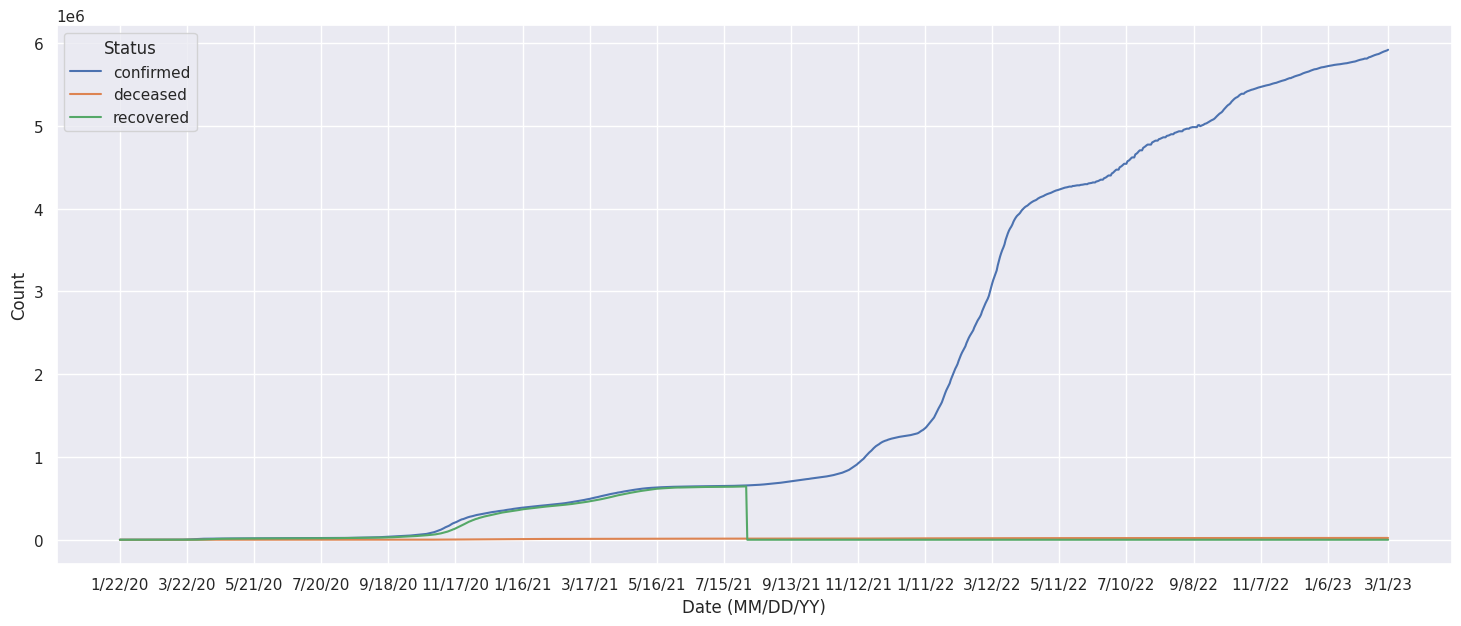

In [11]:
# Prepare COVID-19 data set for plotting.
data_processed_covid_19 = data_covid_19.copy().reset_index()
data_processed_covid_19 = data_processed_covid_19.melt(
    id_vars='index', var_name='Status', value_name='Count'
)
data_processed_covid_19 = data_processed_covid_19.rename(columns={'index': 'Date (MM/DD/YY)'})

# Plot confirmed, deceased as well as recovered COVID-19 cases.
fig, ax = plt.subplots(1, 1, figsize=(18, 7))
ax.set(xticks=list(range(0, len(data_covid_19.index), 60)) + [len(data_covid_19.index) - 1])
sns.lineplot(x='Date (MM/DD/YY)', y='Count', hue='Status', data=data_processed_covid_19, ax=ax)
plt.show()

<p>We now add <i>three</i> more columns to the COVID-19 dataframe, to represent the difference of each consecutive date entry per status.</p>

<center>
    <ul>
        <li style="display:inline-block;width:150px;text-align:left;vertical-top:sub;">
            <span style="font-size:26px;vertical-align:sub">&bull;</span>
            <span style="vertical-top:sub;">newly_confirmed</span>
        </li>
        <li style="display:inline-block;width:150px;text-align:left;vertical-top:sub;">
            <span style="font-size:26px;vertical-align:sub">&bull;</span>
            <span style="vertical-top:sub;">newly_deceased</span>
        </li>
        <li style="display:inline-block;width:150px;text-align:left;vertical-top:sub;">
            <span style="font-size:26px;vertical-align:sub">&bull;</span>
            <span style="vertical-top:sub;">newly_recovered</span>
        </li>
    </ul>
</center>

<p>As we are working with a <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html">pandas.DataFrame</a>, the modification is quite straightforward.</p>

In [12]:
# Create a copy of the original COVID-19 data set to keep it unmodified.
data_new_covid_19 = data_covid_19.copy()

# Add columns to represent the difference of each consecutive date entry per status.
data_new_covid_19['newly_confirmed'] = data_new_covid_19['confirmed'].diff().fillna(0)
data_new_covid_19['newly_deceased'] = data_new_covid_19['deceased'].diff().fillna(0)
data_new_covid_19['newly_recovered'] = data_new_covid_19['recovered'].diff().fillna(0)

# The drop above (missing data) results in an extreme outlier value, so handle this outlier before plotting below.
outlier_threshold = -abs(data_new_covid_19["newly_recovered"].median()) * 1000  # very simple heuristic
data_new_covid_19.loc[data_new_covid_19["newly_recovered"] < outlier_threshold, "newly_recovered"] = 0  # should be median * X based (X is some scaling factor to detect outliers)

# Print the resulting dataframe.
data_new_covid_19

confirmed  deceased  recovered  newly_confirmed  newly_deceased  \
1/22/20          0         0          0              0.0             0.0   
1/23/20          0         0          0              0.0             0.0   
1/24/20          0         0          0              0.0             0.0   
1/25/20          0         0          0              0.0             0.0   
1/26/20          0         0          0              0.0             0.0   
...            ...       ...        ...              ...             ...   
2/25/23    5897047     21872          0           6011.0            14.0   
2/26/23    5901938     21872          0           4891.0             0.0   
2/27/23    5905405     21872          0           3467.0             0.0   
2/28/23    5911294     21887          0           5889.0            15.0   
3/1/23     5919616     21891          0           8322.0             4.0   

         newly_recovered  
1/22/20              0.0  
1/23/20              0.0  
1/24/20              0.0  
1/25/20              0.0  
1/26/20              0.0  
...                  ...  
2/25/23              0.0  
2/26/23              0.0  
2/27/23              0.0  
2/28/23              0.0  
3/1/23               0.0  

[1135 rows x 6 columns]

<p>Once again, let's plot the newly added columns in order to be able to easier interpret their values – a <i>lineplot</i>, as mentioned previously, seems to be the perfect fit for this kind of data. The original columns are getting removed, so the focus lies completely on the three new ones.</p>

/home/olegbushtyrkov/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/olegbushtyrkov/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/olegbushtyrkov/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


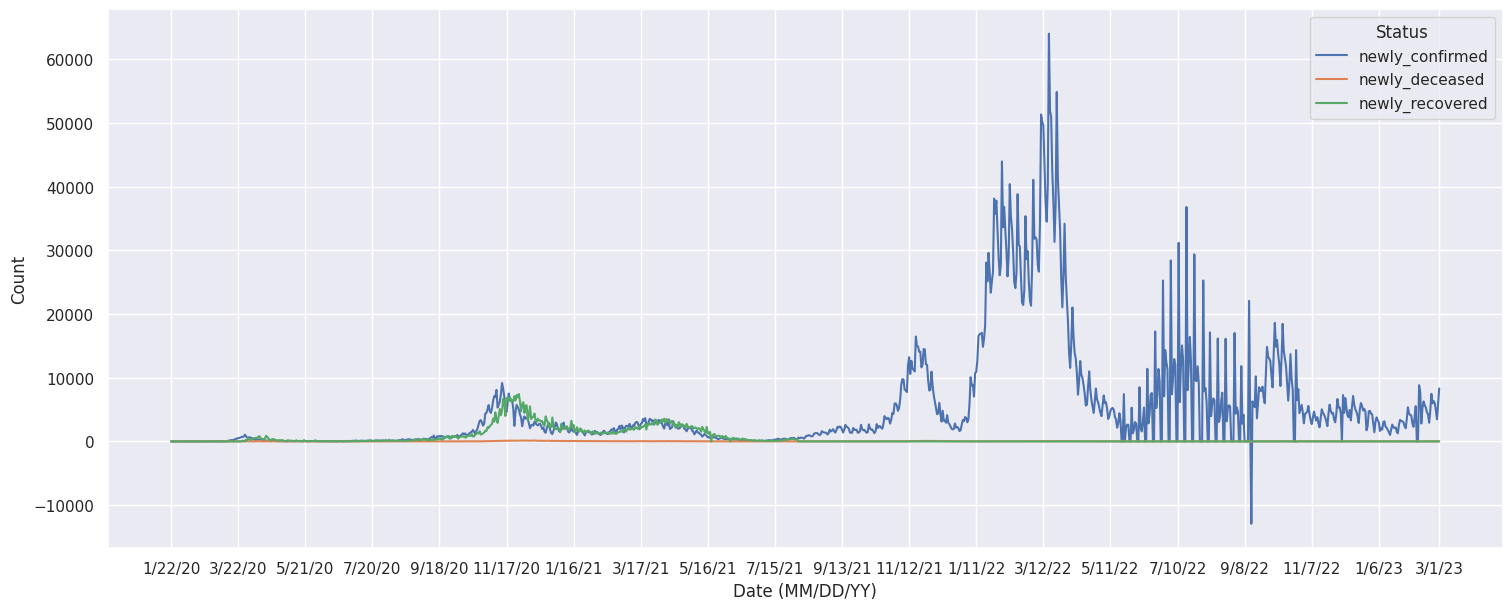

In [13]:
# Prepare COVID-19 data set for plotting.
data_new_processed_covid_19 = data_new_covid_19.copy().reset_index()
data_new_processed_covid_19 = data_new_processed_covid_19.drop(['confirmed', 'deceased', 'recovered'], axis=1)
data_new_processed_covid_19 = data_new_processed_covid_19.melt(
    id_vars='index', var_name='Status', value_name='Count'
)
data_new_processed_covid_19 = data_new_processed_covid_19.rename(columns={'index': 'Date (MM/DD/YY)'})

# Plot confirmed, deceased as well as recovered COVID-19 cases.
fig, ax = plt.subplots(1, 1, figsize=(18, 7))
ax.set(xticks=list(range(0, len(data_covid_19.index), 60)) + [len(data_covid_19.index) - 1])
sns.lineplot(x='Date (MM/DD/YY)', y='Count', hue='Status', data=data_new_processed_covid_19, ax=ax)
plt.show()

<p>The <a href="https://github.com/CSSEGISandData/COVID-19">Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE)</a> maintains a dashboard of the current COVID-19 data (it comprises all publicly available data of the world). Let's have a short glance at the current situation:</p>

In [14]:
u1.setup_covid_dashboard()

<a name="tasks-two"></a><h3 style="color:rgb(0,120,170)">Tasks</h3>
    <div class="alert alert-warning">
        Execute the notebook until here and try to solve the following tasks:
        <ul>
            <li>Print and visualise the COVID-19 data for different countries/regions. Do you observe some correlations with neighboring ones?</li>
            <li>Experiment with the COVID-19 dashboard from JHU CSSE and analyze the current situation.</li>
        </ul>
</div>

<a name="image-data"></a><h2>Image data</h2>
<p>Images are usually represented in $3$ dimensions, i.e. $height$ x $width$ x $channels$. <i>Channels</i> are different layers which, combined, produce the final image. Often these are <i>red</i>, <i>green</i> and <i>blue</i> channels, or <i>RGB</i> in short. For all the following tasks we experiment with a picture of our research dog <i>Charlie</i> (don't worry, he is fine with that). He is an integral and important part of our group. Generously, he has allowed us to use photographs of him.</p>

<p>
    <center>
        <img src="./resources/charlie_1.jpg" width="500"/>
    </center>
</p>
    
<p>By executing the code below we can inspect the dimensions of an image and see that it has a height of $1200$ pixels, a length of $1599$ pixels, and $3$ channels. If you work with images, checking the dimensions of an image is always a good starting point.</p>

In [15]:
# Load image of Charlie from specified path.
image_path = 'resources/charlie_1.jpg'
with Image.open(image_path) as image_data:
    image_charlie = np.array(image_data)

# Print shape of the Charlie image.
print(f'Shape of Charlie: {image_charlie.shape}')

Shape of Charlie: (1200, 1599, 3)


<p>Which and how many channels an image consists of is defined by the <i>color model</i>.</p>

<p>Another important term, the <i>color depth</i> of an image (also bit depth) refers to the number of colors that can be represented by each pixel. Very common color depths for images used in the field of AI are <i>8-bit</i> and <i>16-bit</i>. For 8-bit images every channel can contain values ranging from $0$ to $255$ ($2^8 = 256$ colors). Analogously, the values of 16-bit images can range from $0$ to $65,535$ ($2^{16} = 65,536$ colors) per channel. Be aware that a higher number of colors goes along with a higher memory consumption (which can be a bottelneck when learning from images).</p>

<p>With the following code snippet you can inspect
<ul>
    <li>the minimum value,</li>
    <li>the arithmetic mean,</li>
    <li>the maximum value</li>
</ul>
of our Charlie image per channel:</p>

In [16]:
# Specify the channel for which to compute the corresponding value range (R=0, G=1, B=2).
channel_index = 0

# Compute and print the value range as well as the mean of the specified channel.
print(f'Minimum value of channel {channel_index}: {np.min(image_charlie[:,:,channel_index]):>3}')
print(f'   Mean value of channel {channel_index}: {np.mean(image_charlie[:,:,channel_index]):>6,.2f}')
print(f'Maximum value of channel {channel_index}: {np.max(image_charlie[:,:,channel_index]):>3}')

Minimum value of channel 0:   0
   Mean value of channel 0: 113.01
Maximum value of channel 0: 255


<a name="color-models"></a><h3 style="color:rgb(0,120,170)">Color models</h3>
<h4>RGB</h4>
<p>The <i>RGB</i> color model is additive and the most important model for colored images. It uses $3$ channels, namely a red (R), green (G) and blue (B) channel. Its called additive as adding up the 3 color channels results in an image like above. The corresponding color channels are displayed below.</p>

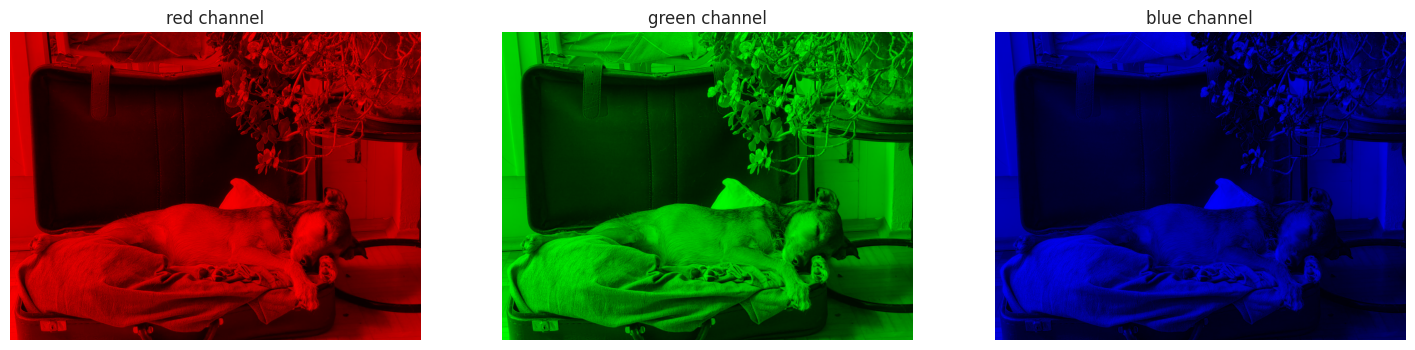

In [17]:
# Compute and plot the 3 color channels of the Charlie image.
image_path = 'resources/charlie_1.jpg'
u1.plot_image_channels_rgb(image_path=image_path, figsize=(18, 7))

<h4>RGBA</h4>
<p>A variant of RGB, <i>RGBA</i>, uses a fourth channel <i>A</i> – which stands for <i>Alpha</i>. This channel controls the transparency of an image.</p>

<p>
    <table>
        <th>Alpha Value</th>
        <th>Description</th>
        <tr style="text-align:center">
            <td>$0.0$</td>
            <td>Minimum alpha value, which leads to a completely <i>transparent</i> image.</td>
        </tr>
        <tr style="text-align:center">
            <td>$1.0$</td>
            <td>Maximum alpha value, which leads to a completely <i>opaque</i> image.</td>
        </tr>
    </table>
</p>

Let's try to get Charlie a little bit more transparent.

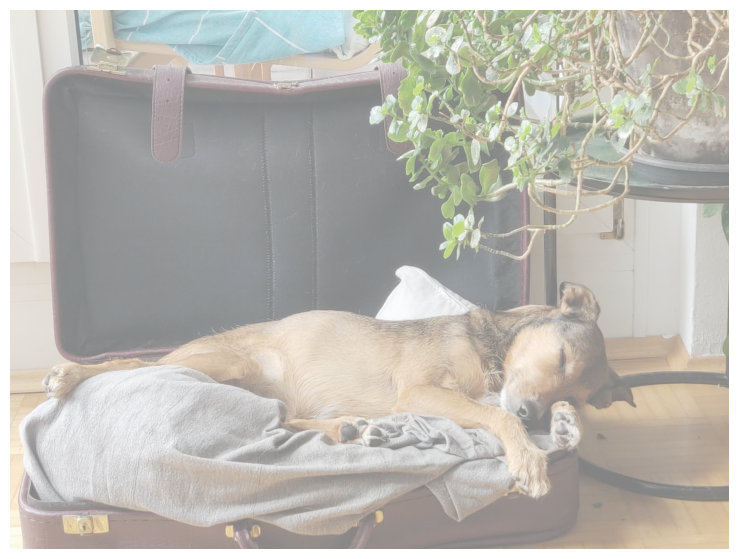

In [18]:
# Set alpha channel and plot the Charlie image.
image_path = 'resources/charlie_1.jpg'
u1.plot_image(image_path, alpha=0.5, figsize=(19, 7))

<h4>Grayscale</h4>
<p>Sometimes, images have only one channel representing the brightness. These are called grayscale images. Color images can be converted to grayscale but the inverse, i.e. converting a grayscale to a color image is not possible without additional information.</p>

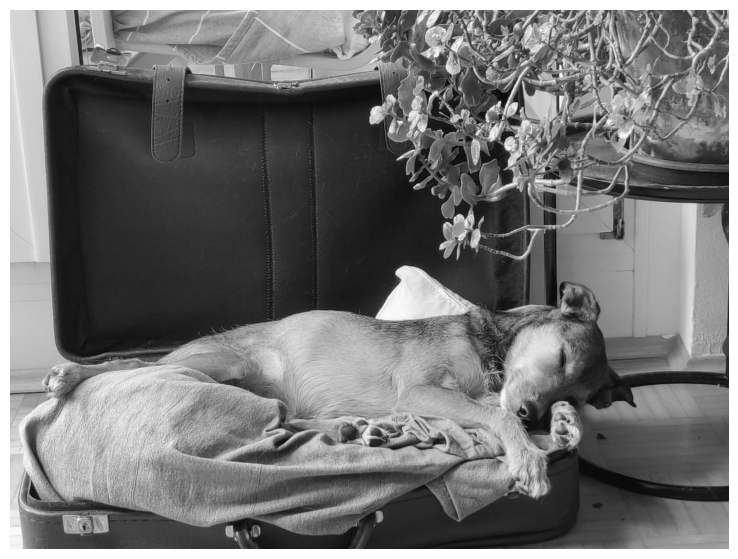

In [19]:
# Convert the Charlie image to grayscale and plot the result.
image_path = 'resources/charlie_1.jpg'
u1.plot_image(image_path, grayscale=True, figsize=(19, 7))

<a name="image-augmentation"></a><h3 style="color:rgb(0,120,170)">Image augmentation</h3>
<p>In computer vision, a field of computer science focused on processing and understanding images (and other forms of visual input, e.g. videos), there has been a strong shift towards machine learning as a way to understand, manipulate and even generate images. This shift can be explained in part with the extremely high complexity and dimensionality of information contained in images, making it very hard to build functions that work with images by hand.</p>

<p>Let us, for example, think about a function that takes as an input an arbitrary image and has to output if this is an image of Charlie or not. Just comparing the image with photos of Charlie could work, but only if you have a very large database of images showing Charlie in every situation (e.g. different environments, lighting conditions, poses, angles and so on). Still, this approach would probably not give you 100% accurate results.</p>

<p>Another approach could be to design a function that "<i>models</i>" Charlie, i.e. that looks for
    <center>
        <ul>
            <li style="display:inline-block;width:150px;text-align:left;vertical-top:sub;">
                <span style="font-size:26px;vertical-align:sub">&bull;</span>
                <span style="vertical-top:sub;">eyes</span>
            </li>
            <li style="display:inline-block;width:150px;text-align:left;vertical-top:sub;">
                <span style="font-size:26px;vertical-align:sub">&bull;</span>
                <span style="vertical-top:sub;">mouth</span>
            </li>
            <li style="display:inline-block;width:150px;text-align:left;vertical-top:sub;">
                <span style="font-size:26px;vertical-align:sub">&bull;</span>
                <span style="vertical-top:sub;">furs</span>
            </li>
            <li style="display:inline-block;width:150px;text-align:left;vertical-top:sub;">
                <span style="font-size:26px;vertical-align:sub">&bull;</span>
                <span style="vertical-top:sub;">nose</span>
            </li>
            <li style="display:inline-block;width:150px;text-align:left;vertical-top:sub;">
                <span style="font-size:26px;vertical-align:sub">&bull;</span>
                <span style="vertical-top:sub;">ears</span>
            </li>
        </ul>
    </center>
</p>
    
<p>and so on (each of which is still a hard problem) and then decides based on rules if an image shows Charlie or not. As you can imagine this is very hard, as again you have to account for innumerable different scenarios and conditions.</p>

<p>A machine learning approach can be viewed as a combination of those two approaches. We "show" a machine learning model a large number of images with and without Charlie and train it to distinguish between these two groups. The model should extract <i>features</i> and rules how to combine them itself, so we don't have to come up with them. With enough images this turns out to work very well.</p>

<p>However, getting a lot of images with Charlie is still a lot of work, so to reduce our workload we can <i>augment</i> the set of images we have already by artificially changing them such that the original content is preserved (i.e. a scene with Charlie or not) but in a slightly different way.</p>

<h4>Rotation</h4>
<p>A common augmentation method is to rotate images around their center by a certain angle. As with every other augmentation method it always depends on the task you want to solve how much rotation makes sense or if you want to use this method at all (e.g. lots of images with Charlie rotated by $90$ degrees might not make too much sense).</p>

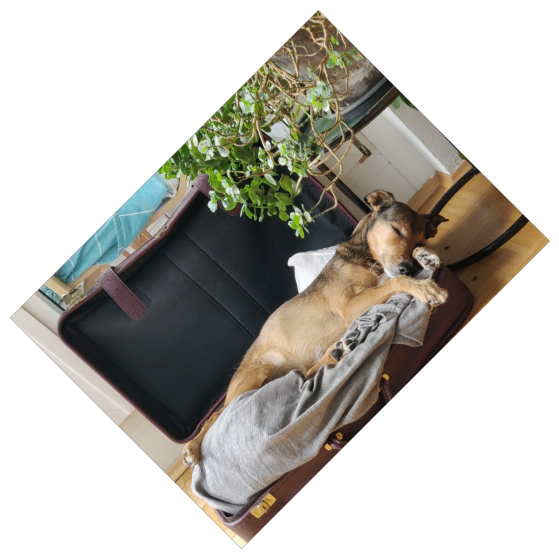

In [20]:
# Rotate the Charlie image by 45 degrees and plot the result.
image_path = 'resources/charlie_1.jpg'
u1.plot_image(image_path, rotation_angle=45, figsize=(19, 7))

<h4>Flipping</h4>
<p>Another very common augmentation technique is <i>flipping</i>, i.e. mirroring the image across its horizontal or vertical axis.</p>

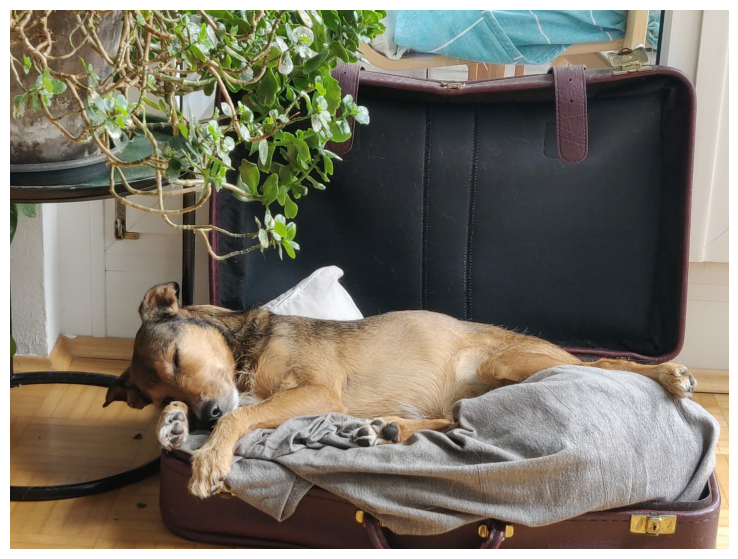

In [21]:
# Flip the Charlie image vertically and plot the result.
image_path = 'resources/charlie_1.jpg'
u1.plot_image(image_path, flip='vertical', figsize=(19, 7))

<h4>Zooming/Cropping</h4>
<p>To see Charlie in different sizes an easy solution is to zoom into the image. As most machine learning methods require that all images have the same resolution this means selecting a smaller part of the image and then resizing it to the original resolution.</p>

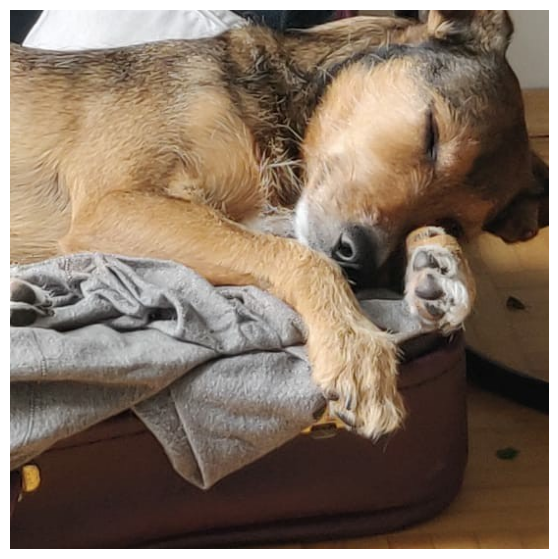

In [22]:
# Crop the Charlie image and plot the result.
image_path = 'resources/charlie_1.jpg'
u1.plot_image(image_path, cropping=(800, 650, 250, 0), figsize=(19, 7))

<h4>Blurring</h4>
<p>Usually not all images are super sharp, so it helps to show our machine learning model blurry images such that it learns to detect blurred Charlies as well. There are different ways to blur an image, the most common being a <i>Gaussian blur</i>. For this method a filter modelled by a normal distribution (also called Gaussian) is slid over the image and a weighted sum of the filter and the pixels that are covered by the filter is calculated. Don't worry if this sounds complicated, it will become clear later in your studies.</p>

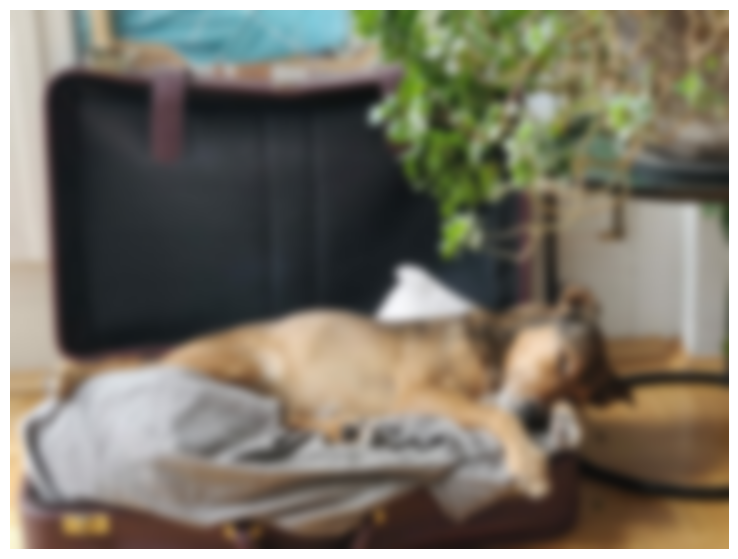

In [23]:
# Blur the Charlie image and plot the result.
image_path = 'resources/charlie_1.jpg'
u1.plot_image(image_path, blur_radius=10, figsize=(19, 7))

<a name="segmentation"></a><h3 style="color:rgb(0,120,170)">Segmentation</h3>
<p>A common problem in computer vision is to mark an object, like a dog, in an image. This is called <i>segmentation</i> as we segment the image into "object" and "not object". As you can imagine, this is not easy and there are several methods to tackle this problem. In the course of your studies you will learn to segment images using machine learning methods but for now let's try a very simple method to illustrate the difficulty of this problem.
First, let's look at the <i>histogram</i> of Charlie's image. A histogram shows the occurance of individual color values of an image.</p>

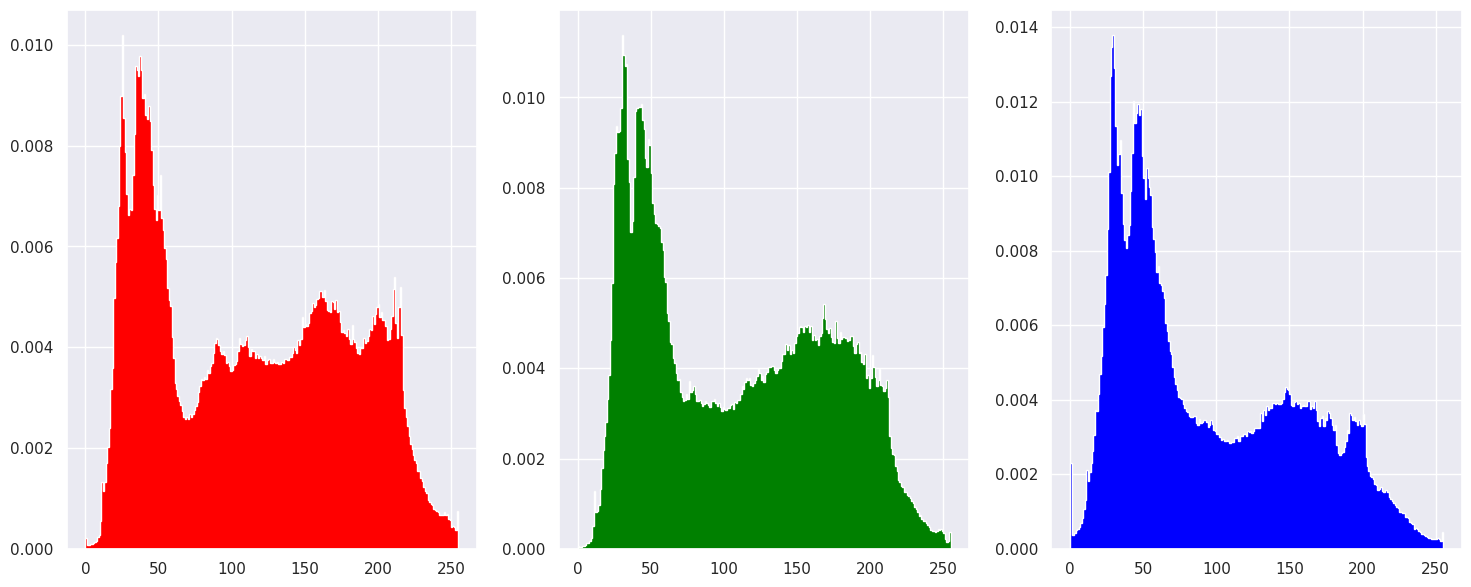

In [24]:
# Compute the histogram of the Charlie image and plot the result.
image_path = 'resources/charlie_1.jpg'
u1.plot_image_histogram(image_path, figsize=(18, 7))

<p>Now, look at the histograms and try to find <i>threshold</i> values for each color to segment the image into Charlie and background. You can supply for each channel separately the lower and upper thresholds, whereas the values inbetween are kept (for <i>red</i>, <i>green</i> and <i>blue</i> respectively). Don't worry if you can't get a perfect segmentation, but see if you can find better values.</p>

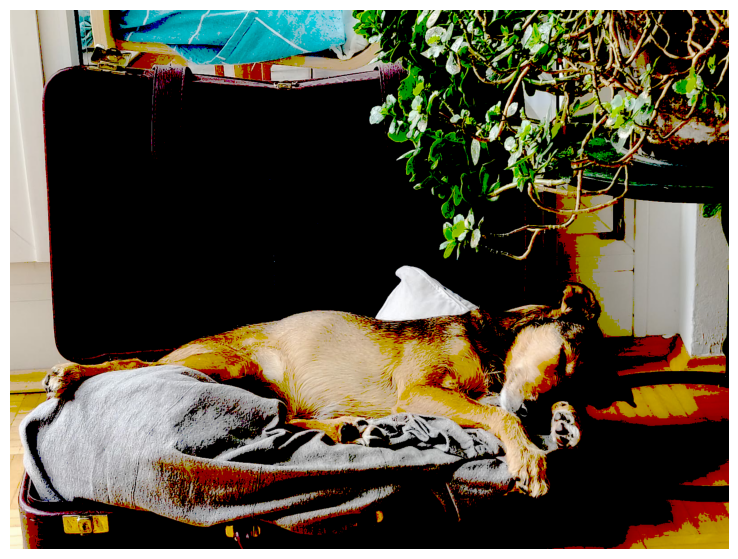

In [25]:
# Segment the Charlie image and plot the result.
image_path = 'resources/charlie_1.jpg'
u1.plot_image(image_path, segmentation_thresholds=(128, None, 128, None, 128, None), figsize=(14, 7))

<a name="tasks-three"></a><h3 style="color:rgb(0,120,170)">Tasks</h3>
    <div class="alert alert-warning">
        Execute the notebook until here and try to solve the following tasks:
        <ul>
            <li>Compute the <i>minumum</i>, <i>arithmetic mean</i> and <i>maximum</i> value of the second and third channel. Which values are different?</li>
            <li>Experiment with different alpha channel values and combine grayscale and alpha channel. What do you observe?</li>
            <li>Try to get a crop of Charlie's right eye.</li>
            <li>Try to segment the plant above Charlie. Which color channel might be important here? What do you observe?</li>
        </ul>
</div>

<a name="classifiers"></a><h2>Classifiers</h2>
<p>Starting from this section you will be working with a data set composed of various <i>images</i> of fashion items (e.g. shoes or shirts). The data set distinguishes <i>ten</i> different classes, one for each type of fashion item. For curious minds, more information regarding this data set can be found at:

<center><cite>Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. arXiv:1708.07747</cite></center>

Summarizing, the popular Fashion-MNIST data set contains grayscale images of  $n=70000$ different fashion items from ten different classes, namely:</p>

| Target   | Name        | Examples                                                  |
|:--------:|:-----------:|:---------------------------------------------------------:|
| 0        | T-shirt/top | ![Image not found!](resources/fashion_mnist_sprite_0.png) |
| 1        | Trouser     | ![Image not found!](resources/fashion_mnist_sprite_1.png) |
| 2        | Pullover    | ![Image not found!](resources/fashion_mnist_sprite_2.png) |
| 3        | Dress       | ![Image not found!](resources/fashion_mnist_sprite_3.png) |
| 4        | Coat        | ![Image not found!](resources/fashion_mnist_sprite_4.png) |
| 5        | Sandal      | ![Image not found!](resources/fashion_mnist_sprite_5.png) |
| 6        | Shirt       | ![Image not found!](resources/fashion_mnist_sprite_6.png) |
| 7        | Sneaker     | ![Image not found!](resources/fashion_mnist_sprite_7.png) |
| 8        | Bag         | ![Image not found!](resources/fashion_mnist_sprite_8.png) |
| 9        | Ankle boot  | ![Image not found!](resources/fashion_mnist_sprite_9.png) |

<p>Below you can see a table with all $70000$ samples (we start to count at 0). Remember, tabular data can have columns in various data types. In our case the $784$ features are given in floating point numbers (recall <i>primitive data types</i>). We would refer to the fashion item type as a <i>label</i>, <i>target</i> or <i>class</i> rather than a feature, because we want to predict the fashion item type using all the features.</p>

In [26]:
data_fashion_mnist = u1.load_fashion_mnist()
data_fashion_mnist

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0    33.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  \
0          0.0  ...       0.0       0.0       0.0       0.0       0.0   
1          0.0  ...     114.0     130.0      76.0       0.0       0.0   
2         22.0  ...       0.0       1.0       0.0       0.0       0.0   
3         96.0  ...       0.0       0.0       0.0       0.0       0.0   
4          0.0  ...       0.0       0.0       0.0       0.0       0.0   
...        ...  ...       ...       ...       ...       ...       ...   
69995      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69996     31.0  ...       0.0       0.0       0.0       0.0       0.0   
69997      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69998      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69999      0.0  ...       0.0       0.0       0.0       0.0       0.0   

       pixel781  pixel782  pixel783  pixel784  item_type  
0           0.0       0.0       0.0       0.0          9  
1           0.0       0.0       0.0       0.0          0  
2           0.0       0.0       0.0       0.0          0  
3           0.0       0.0       0.0       0.0          3  
4           0.0       0.0       0.0       0.0          0  
...         ...       ...       ...       ...        ...  
69995       0.0       0.0       0.0       0.0          9  
69996       0.0       0.0       0.0       0.0          1  
69997       0.0       0.0       0.0       0.0          8  
69998       0.0       0.0       0.0       0.0          1  
69999       0.0       0.0       0.0       0.0          5  

[70000 rows x 785 columns]

<p>Before we can start with classifying the data, we have to split our data set into a <i>training set</i> and into a <i>test set</i>. The training set will be used (as the name suggests) for training the classifier, the test set (as the name also suggests) will be used for testing the classifier on unseen data. <i>Unseen</i> in this case means that the data has not been used for training and we can therefore get a feeling how good our classifier performs in general.</p>

<p>We now divide the data set between the training set and the test set in a ratio of $2:1$. Note that the train-test split is performed randomly meaning that by execution of the command the chance that a sample lands in the training (test) set is a prior given by the split ratio. Therefore, we will hardly obtain the same training (test) data set again using a different random seed.</p>

In [27]:
# Set random seed for reproducibility.
u1.set_seed(0)

# Split the Fashion-MNIST data set into training as well as test set and print their respective size.
data_fashion_mnist_train, data_fashion_mnist_test = u1.split_data(data_fashion_mnist, test_size=1.0 / 3.0)
print(f'  Full data set is of size: {data_fashion_mnist.shape[0]:>5}')
print(f'Training subset is of size: {data_fashion_mnist_train.shape[0]:>5}')
print(f' Testing subset is of size: {data_fashion_mnist_test.shape[0]:>5}')

  Full data set is of size: 70000
Training subset is of size: 46666
 Testing subset is of size: 23334


<p>As most data sets are comprised of samples which are described by a vast amount of features, <i>dimensionality reduction</i> techniques come in very handy. Especially for visualization purposes, projecting samples down to <i>two</i> or <i>three</i> components is a great start on getting your hands on the data set. Moreover, a lower dimensional data set is often required in order to speed up downstream analysis.</p>

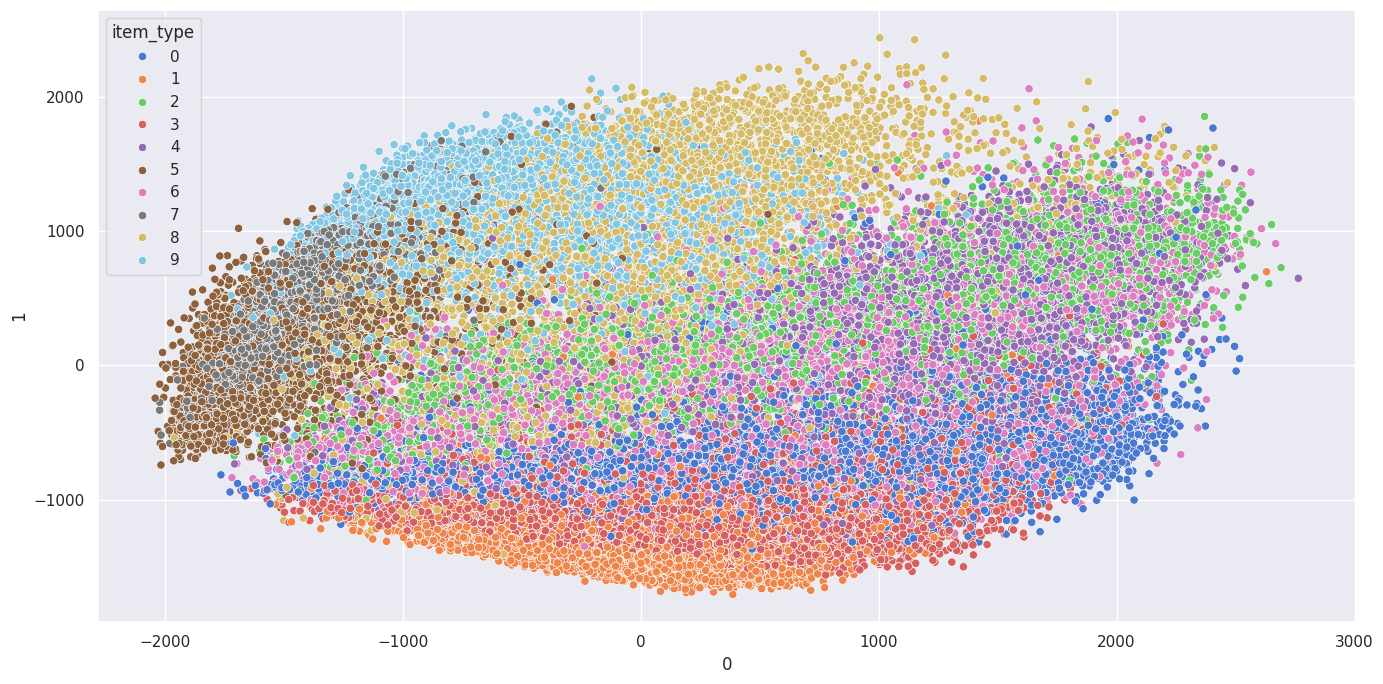

In [28]:
# Compute Principal Component Analysis (PCA) and reduce the dimensionality of the Fashion-MNIST data set.
data_fashion_mnist_train_pca, data_fashion_mnist_train_components = u1.apply_pca(
    n_components=2, data=data_fashion_mnist_train, target_column='item_type', return_components=True)
u1.plot_points_2d(data=data_fashion_mnist_train_pca, target_column='item_type', figsize=(14, 7))

<a name="k-nearest-neighbors"></a><h3 style="color:rgb(0,120,170)">$k$-nearest neighbors</h3>
<p>Suppose we have a labeled data set and a distance measure on the input space. The <i>$k$-nearest neighbors</i> classifier assigns class values according to the class that occurs most often among $k$ samples closest to the input vector $\boldsymbol{x}$.

<center>
    <img src="resources/knn_sketch.png" width="400" align="center"/>
</center>

Now it is time to evoke the <i>$k$-nearest neighbors classifier</i>. The only important parameter for the method is the number of neighbors <code>n_neighbors</code> which determines how many ($k$) samples will be taken into account for obtaining the class of an input sample.</p>

In [29]:
# Apply PCA on Fashion-MNIST using the principal components computed on the corresponding training set.
data_fashion_mnist_test_pca = u1.apply_pca(data=data_fashion_mnist_test, target_column='item_type', components=data_fashion_mnist_train_components)

# Compute the k-nearest neighbors classifier for different valus of k and print the respective results.
range_k = list(range(1, 42, 7))
for n_neighbors in range_k:
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors, n_jobs=-1)
    knn_classifier.fit(data_fashion_mnist_train_pca.drop(columns='item_type'), data_fashion_mnist_train_pca['item_type'])
    knn_score_train = knn_classifier.score(data_fashion_mnist_train_pca.drop(columns='item_type'), data_fashion_mnist_train_pca['item_type'])
    knn_score_test = knn_classifier.score(data_fashion_mnist_test_pca.drop(columns='item_type'), data_fashion_mnist_test_pca['item_type'])
    print(f'Mean accuracy (k = {str(n_neighbors).zfill(len(str(max(range_k))))}): {knn_score_train:1.4f} (train) | {knn_score_test:1.4f} (test)')

Mean accuracy (k = 01): 1.0000 (train) | 0.4461 (test)
Mean accuracy (k = 08): 0.6223 (train) | 0.5251 (test)
Mean accuracy (k = 15): 0.6004 (train) | 0.5388 (test)
Mean accuracy (k = 22): 0.5889 (train) | 0.5471 (test)
Mean accuracy (k = 29): 0.5859 (train) | 0.5513 (test)
Mean accuracy (k = 36): 0.5821 (train) | 0.5513 (test)


<p>A trained classifier does not only work on the points used for training (or testing) but on every point in the input space. Next, we therefore have a look how any point would be classified. The lines between the different classification regions are called <i>decision boundaries</i>. The following code snippet allows to obtain the decision boundaries for any combination of two input variables.</p>

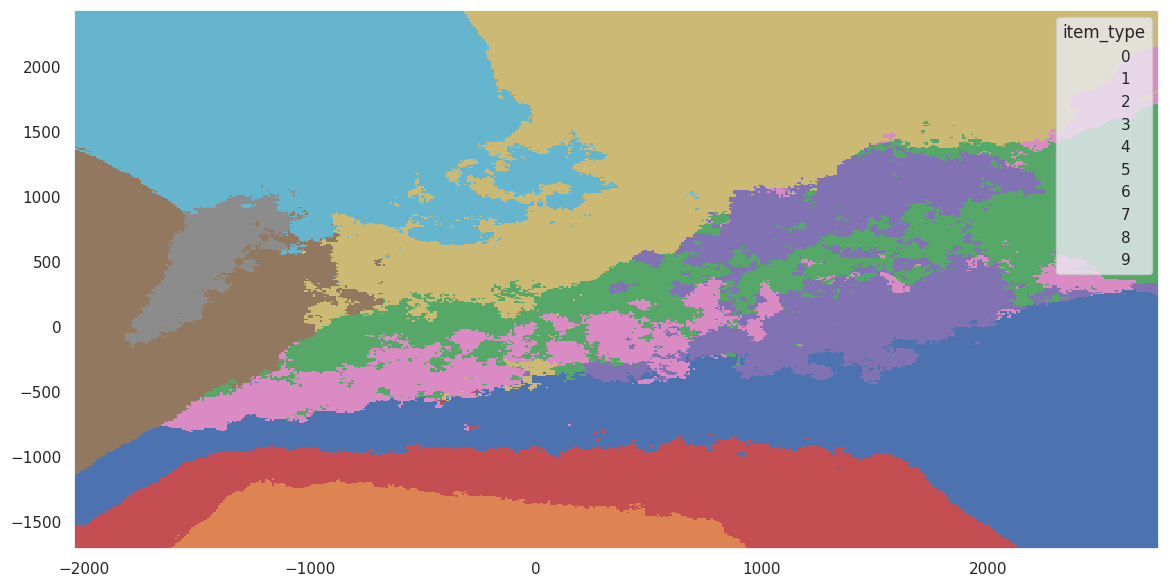

In [30]:
# Compute the k-nearest neighbors classifier for a specified k and plot the resulting decision boundaries.
knn_classifier = KNeighborsClassifier(n_neighbors=48, n_jobs=-1)
knn_classifier.fit(data_fashion_mnist_train_pca.drop(columns='item_type'), data_fashion_mnist_train_pca['item_type'])
u1.plot_decision_boundaries(data=data_fashion_mnist_train_pca, classifier=knn_classifier, granularity=10.0, figsize=(14, 7))

<a name="convolutional-neural-networks"></a><h3 style="color:rgb(0,120,170)">Convolutional neural networks (CNNs)</h3>
<p>We now extend to a more sophisticated method: <i>convolutional neural networks</i> (<i>CNNs</i> or <i>ConvNets</i> in short). A <i>convolutional neural network</i> is a class of deep neural networks, most commonly applied to analyzing all sorts of images. The name indicates that the network employs a <i>mathematical operation</i> called <i>convolution</i>. Convolutional networks are any neural networks that use convolution in place of general matrix multiplication in at least one of their layers.</p>

<p>Like other neural networks, a convolutional neural network consists of an input and an output layer, as well as multiple hidden layers. The hidden layers of a CNN typically consist of a series of <i>convolutional layers</i>, <i>pooling layers</i>, and <i>fully connected layers</i>. Though the layers are colloquially referred to as convolutions, this is only by convention. Mathematically, it is technically a sliding dot product or <i>cross-correlation</i>.</p>

<center>
    <img src="resources/cnn_sketch.jpg" width="700" align="center"/>
    <p>
        <center>
            Image taken from:
            <cite>
                Peng et al. "Dual Temporal Scale Convolutional Neural Network for Micro-Expression Recognition". in Front Psychol. (2017)
            </cite>
        </center>
    </p>
</center>

<center>
    <img src="resources/cnn_architecture.jpg" width="700" align="center"/>
    <p>
        <center>
            Image provided by <a href="https://www.jku.at/en/institute-for-machine-learning/about-us/team/elisabeth-rumetshofer/">
                <i>Elisabeth Rumetshofer</i>.
            </a>
        </center>
    </p>
</center>

<h4>Convolution</h4>

<p><i>Convolution</i> is a mathematical operation on two functions to produce a third function that expresses how the shape of one function is modified by the other function. The term convolution refers to both the result function and to the process of computing it. In a neural network, we will perform the convolution operation on the input image matrix to reduce its shape.

<center>
    <img src="resources/cnn_concept.jpg" width="400" align="center"/>
</center>

The convolutional laye's parameters consist of a set of learnable filters (or <i>kernels</i>), which have a small receptive field, but extend through the full depth of the input volume. During the forward pass, each filter is convolved across the width and height of the input volume, computing the dot product between the entries of the filter and the input and producing a 2-dimensional activation map of that filter. </p>

<p>As a result, the network learns filters that activate when it detects some specific type of feature at some spatial position in the input. Before digging into <i>convolutional neural networks</i> (or any more sophisticated method), it is always a good idea to get more familiar with the <i>basics</i> first. For this very purpose, we define the <i>Prewitt operator</i> for the <i>horizontal</i> as well as the <i>vertical</i> approximations of the derivatives of the <i>image intensity function</i> as <i>numpy</i> arrays:</p>

<p>
    <center>
        $\begin{equation}P_x = \left( 
            \begin{array}{rrr}                                
                1 & 0 & -1 \\
                1 & 0 & -1 \\
                1 & 0 & -1 \\
            \end{array}\right)
        \end{equation}$
    </center>
</p>
    
<p>
    <center>
        $\begin{equation}P_y = \left( 
            \begin{array}{rrr}                                
                1 & 1 & 1 \\
                0 & 0 & 0 \\
                -1 & -1 & -1 \\
            \end{array}\right)
        \end{equation}$
    </center>
</p>

<p>Afterwards we apply both filters on images of the Fashion-MNIST data set.</p>

In [31]:
# Define Prewitt operators.
prewitt_x = np.asarray([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])
prewitt_y = np.asarray([
    [ 1,  1,  1],
    [ 0,  0,  0],
    [-1, -1, -1]
])

# Load Fashion-MNIST images of specified class.
class_index = 8
image_path = f'resources/fashion_mnist_sprite_{class_index}.png'
with Image.open(image_path) as image_data:
    image_fashion_mnist = image_data.convert('L')

# Define plotting figure and corresponding attributes.
fig, ax = plt.subplots(3, 1, figsize=(14, 5), sharex=True)
for axis in ax:
    axis.grid(False)

# Compute and plot both manually defined filters as well as original image.
ax[0].imshow(image_fashion_mnist, cmap='gray')
ax[1].imshow(signal.convolve2d(np.array(image_fashion_mnist), prewitt_x, mode="same"), cmap='gray')
ax[2].imshow(signal.convolve2d(np.array(image_fashion_mnist), prewitt_y, mode="same"), cmap='gray')
plt.show()

<h4>Pooling</h4>
<p>Another important concept of CNNs is <i>pooling</i>, which is a form of down-sampling. There are several functions to implement pooling among which <i>max pooling</i> is the most common. It partitions the input image into a set of non-overlapping rectangles and, for each such sub-region, outputs the maximum.</p>
    
<p>Intuitively, the exact location of a feature is less important than its rough location relative to other features. This is the idea behind the use of pooling in convolutional neural networks. The pooling layer serves to progressively reduce the spatial size of the representation, which in turn reduces the number of parameters. On top of an activation like a <i>ReLU</i> we now apply a max pooling operation which takes the <i>maximum value of 2 times 2 pixels</i>.</p>

<p>
    <center>
        <img src="resources/cnn_max_pooling.jpg" width="400" align="center"/>
    </center>
</p>

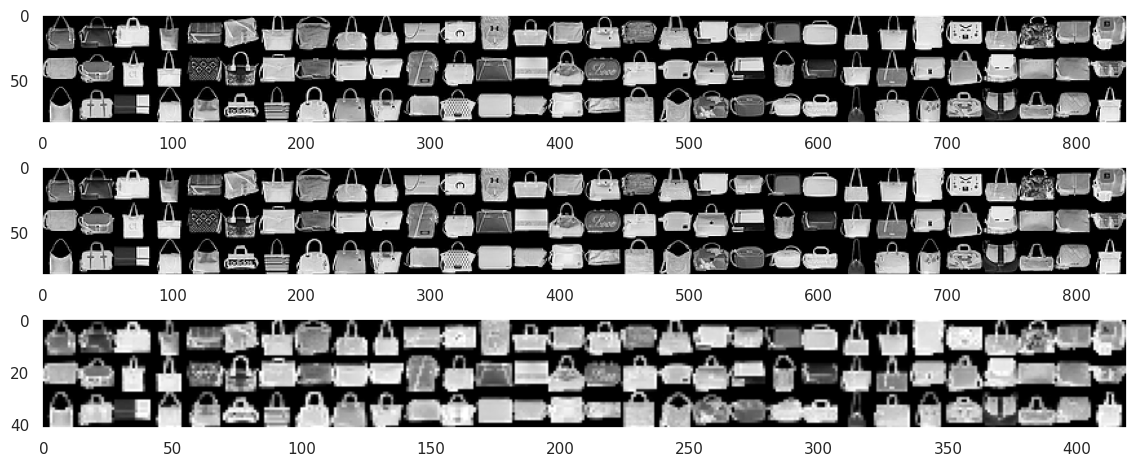

In [32]:
# Define plotting figure and corresponding attributes.
fig, ax = plt.subplots(3, 1, figsize=(14, 7))
fig.subplots_adjust(hspace=-0.35)
for axis in ax:
    axis.grid(False)
    
# Compute ReLU activated image.
image_fashion_mnist_relu = torch.relu(
    torch.as_tensor(np.array(image_fashion_mnist), dtype=torch.float)
)

# Compute max. pooling on top of the ReLU activated image.
image_fashion_mnist_mp = torch.nn.functional.max_pool2d(
    image_fashion_mnist_relu.unsqueeze(dim=0),
    kernel_size=(2, 2)
).squeeze(dim=0)

# Plot resulting images.
ax[0].imshow(image_fashion_mnist, cmap='gray')
ax[1].imshow(image_fashion_mnist_relu, cmap='gray')
ax[2].imshow(image_fashion_mnist_mp, cmap='gray')
plt.show()

<h4>Convolutional neural network</h4>
<p>In one single layer of a convolutional network, we detect multiple features by convolving our image with different filters. Each convolution operation generates a different 2-dimensional matrix. We then apply activation functions to these matrices. Then all of them are stacked together to form a 3-dimensional output. The third dimension of the final output will be equal to the number of filters used in the convolution operation.</p>

<p>
    <center>
        <img src="resources/cnn_output_channels.png" width="450"/>
    </center>
</p>

<p>We now look at a very simple convolutional network and study the dimensions:
    <ul>
        <li>One convolutional layer with 10 kernels and kernel size of 5.</li>
        <li>ReLU as the activation function of choice.</li>
        <li>One pooling layer with a max pooling window of 4 times 4 pixels.</li>
        <li>Two fully connected layers.</li>
    </ul>
</p>

In [33]:
class CNN(torch.nn.Module):
    """
    CNN tailored to process Fashion-MNIST data.
    """
    
    def __init__(self):
        super().__init__()
        self.conv1 = torch.nn.Conv2d(1, 10, 5)
        self.fc1 = torch.nn.Linear(10 * 6 * 6, 200)
        self.fc2 = torch.nn.Linear(200, 10)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # Size changes from (1, 28, 28) to (10, 24, 24).
        x = torch.relu(self.conv1(x))
        
        # Size changes from (10, 24, 24) to (10, 6, 6).
        x = torch.max_pool2d(x, 4, 4)
        
        # Size changes from (10, 6, 6) to (10 * 6 * 6).
        x = x.view(-1, 10 * 6 * 6)
        
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

In [34]:
# # Alternative way using torch.nn.Sequential (either is fine).
# class CNN(torch.nn.Module):
#     """
#     CNN tailored to process Fashion-MNIST data.
#     """
    
#     def __init__(self):
#         super().__init__()
#         self.conv_stack = torch.nn.Sequential(
#             torch.nn.Conv2d(1, 10, 5),  # Size changes from (1, 28, 28) to (10, 24, 24).
#             torch.nn.ReLU(),
#             torch.nn.MaxPool2d(4)  # Size changes from (10, 24, 24) to (10, 6, 6).
#         )
#         self.fc_stack = torch.nn.Sequential(
#             torch.nn.Flatten(),  # Size changes from (10, 6, 6) to (10 * 6 * 6).
#             torch.nn.Linear(10 * 6 * 6, 200),
#             torch.nn.ReLU(),
#             torch.nn.Linear(200, 10)
#         )

#     def forward(self, x: torch.Tensor) -> torch.Tensor:
#         x = self.conv_stack(x)
#         x = self.fc_stack(x)
#         return x

<p>Before actually training a <i>convolutional neural network</i> on Fashion-MNIST data, we have to pre-process the images in order to be of the correct shape. For this very purpose, we are creating two <code>TensorDataset</code> instances, which are encapsulated in a separate <code>Dataloader</code> instance for the <i>training</i> as well as <i>test</i> data set.</p>

<p>As the definitions of <code>loader_fashion_mnist_train</code> and <code>loader_fashion_mnist_test</code> might be a little bit intimidating at a first glance, it is always a good idea to keep an eye on the corresponding documentation – <a href="https://pytorch.org/docs/stable/data.html?highlight=tensordataset#torch.utils.data.TensorDataset">TensorDataset</a> and <a href="https://pytorch.org/docs/stable/data.html?highlight=dataloader#torch.utils.data.DataLoader">DataLoader</a>.</p>

In [35]:
# Create data loader for iterating the Fashion-MNIST training data set.
loader_fashion_mnist_train = torch.utils.data.DataLoader(
    dataset=torch.utils.data.TensorDataset(
        torch.from_numpy(data_fashion_mnist_train.drop(columns=['item_type']).values).reshape(len(data_fashion_mnist_train), 1, 28, 28),
        torch.from_numpy(data_fashion_mnist_train['item_type'].values)
    ),
    batch_size=128,
    shuffle=True
)

# Create data loader for iterating the Fashion-MNIST test data set.
loader_fashion_mnist_test = torch.utils.data.DataLoader(
    dataset=torch.utils.data.TensorDataset(
        torch.from_numpy(data_fashion_mnist_test.drop(columns=['item_type']).values).reshape(len(data_fashion_mnist_test), 1, 28, 28),
        torch.from_numpy(data_fashion_mnist_test['item_type'].values)
    ),
    batch_size=128,
    shuffle=False
)

Now everything is configured and ready to be applied. In the following, a basic training and evaluation loop gets defined.

In [36]:
# Set random seed for reproducibility.
u1.set_seed(0)

# Create CNN instance and the corresponding optimizer to use.
target_device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
cnn_model = CNN().to(target_device)
optimizer = torch.optim.SGD(cnn_model.parameters(), lr=1e-3)

# Train and evaluate CNN instance on the Fashion-MNIST training set.
num_epochs = 3
for epoch in range(num_epochs):
    # Train CNN instance for one epoch.
    u1.train_network(
        model=cnn_model,
        data_loader=loader_fashion_mnist_train,
        device=target_device,
        optimizer=optimizer
    )
    
    # Evaluate current CNN instance.
    performance = u1.test_network(
        model=cnn_model,
        data_loader=loader_fashion_mnist_train,
        device=target_device
    )
    
    # Print result of current epoch to standard out.
    print(f'Epoch: {str(epoch + 1).zfill(len(str(num_epochs)))} ' +
          f'/ Train loss: {performance[0]:.4f} / Train accuracy: {performance[1]:.4f}')

# Evaluate final model on test data set.
performance = u1.test_network(
    model=cnn_model,
    data_loader=loader_fashion_mnist_test,
    device=target_device
)
print(f'\nTest loss: {performance[0]:.4f} / Test accuracy: {performance[1]:.4f}')

Epoch: 1 / Train loss: 0.0040 / Train accuracy: 0.8224
Epoch: 2 / Train loss: 0.0035 / Train accuracy: 0.8402
Epoch: 3 / Train loss: 0.0032 / Train accuracy: 0.8534

Test loss: 0.0035 / Test accuracy: 0.8414


<a name="tasks-four"></a><h3 style="color:rgb(0,120,170)">Tasks</h3>
    <div class="alert alert-warning">
        Execute the notebook until here and try to solve the following tasks:
        <ul>
            <li>Compute t-SNE on the Fashion-MNIST data set with $2$ components and experiment with different perplexity values. What do you observe?</li>
            <li>Experiment with different values for $k$ when applying the $k$-nearest neighbor method to the Fashion-MNIST data. Visualize the corresponding decision boundaries.</li>
            <li>Replace the Prewitt filters with custom ones and experiment with them. How do they behave?</li>
        </ul>
</div>